#  Wine Quality Prediction





In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**DAY 1 – Data Understanding & Exploration**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ML_Project /winequality.csv", sep=';')
print("Data imported successfully")

Data imported successfully


In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
# Dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Statistical summary of dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#  DAY 1 Answering analysis questions
# Rows: 1599
# Columns: 12
# All Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
# Target column: quality
# Max alcohol: 14.9
# Min alcohol: 8.4
# Average pH: 3.3111131957473416
# Highest quality: 8
# Lowest quality: 3

## Day 1:
The dataset represents chemical properties of red wine samples and their
corresponding quality scores. Since the original target variable is numeric,
the problem is naturally a regression task. However, after converting the
quality score into GOOD(1) and BAD(0) categories, the problem becomes a
binary classification task.


**DAY 2 – Preprocessing & Target Creation**

In [ ]:
# Check for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


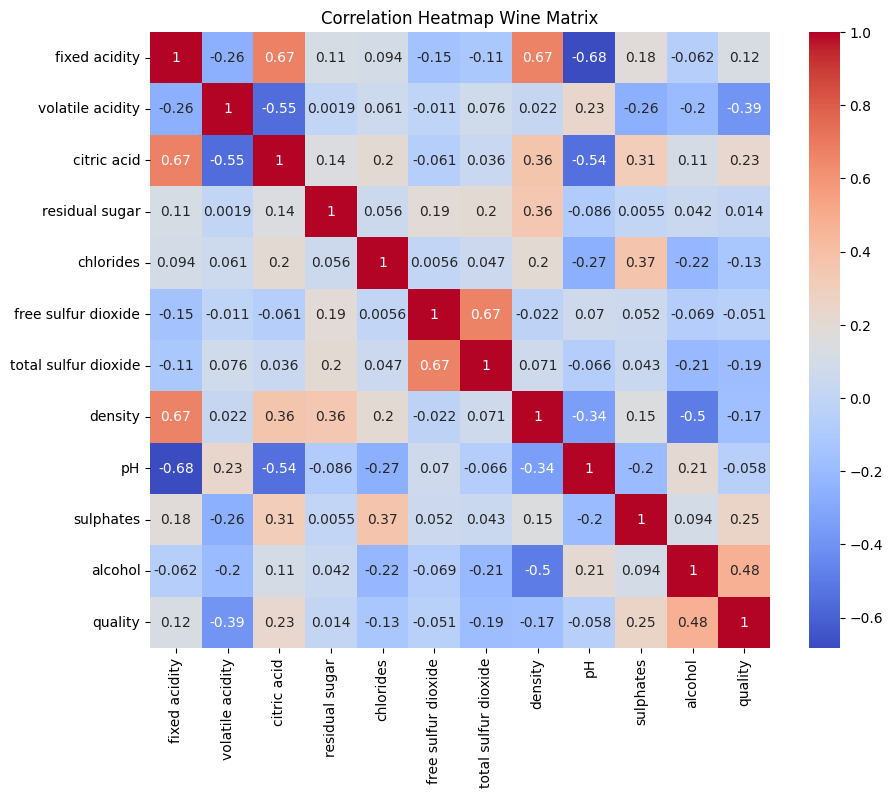

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap Wine Matrix")
plt.show()


In [ ]:
# Correlation with quality
df.corr()['quality'].sort_values(ascending=False)

,quality
quality,1.000000
alcohol,0.476166
sulphates,0.251397
citric acid,0.226373
fixed acidity,0.124052
residual sugar,0.013732
free sulfur dioxide,-0.050656
pH,-0.057731
chlorides,-0.128907
density,-0.174919


Top 3 most correlated wine quality :
1. alcohol= 0.476166 (highest positive correlation)
2. Sulphates = 0.251397 (second positive correlation)
3. Volatile Acid = -0.390558 (third negetive correlation)


In [ ]:
correlation = df.corr()['quality'].sort_values(ascending=True)

print("Top 5 most negatively correlated features:\n")
print(correlation.head(5))
correlation = list(correlation.head(3).index)
print("top 3 important features are :", correlation)

Top 5 most negatively correlated features:

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
Name: quality, dtype: float64
top 3 important features are : ['volatile acidity', 'total sulfur dioxide', 'density']


In [ ]:
# Convert quality into binary classification
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df[['quality', 'quality_label']].head(10)

,quality,quality_label
0,5,0
1,5,0
2,5,0
3,6,0
4,5,0
5,5,0
6,5,0
7,7,1
8,7,1
9,5,0


**DAY 3 – Model Building (Without Scaling)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Feature and target separation
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1599, 11)
Shape of y: (1599,)


In [ ]:
 #Train-test split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (1119, 11)
Test set size: (480, 11)


In [ ]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

print("model traning successfully")

model traning successfully


In [ ]:
import pandas as pd

result = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})

result.head(15)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [ ]:
# Model evaluation
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.8645833333333334
Precision: 0.53125
Recall: 0.2537313432835821
F1 Score: 0.3434343434343434
Confusion Matrix:
 [[398  15]
 [ 50  17]]


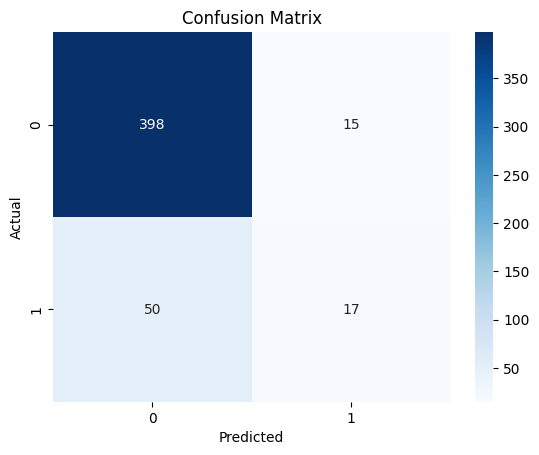

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


**Model performance Analysis :**


The Logistic Regression model achieved an accuracy of 86.46%, which means that about 86% of the total wine samples were classified correctly as GOOD or BAD.

The precision is 0.53, which means that among all wines predicted as GOOD, only 53% were actually GOOD. This indicates that nearly half of the predicted GOOD wines were incorrectly classified.

The recall is 0.25, which is relatively low. This means that the model was able to correctly identify only 25% of the actual GOOD wines. In other words, the model is missing a large number of high-quality wines.

The F1-score is 0.34, which shows that the balance between precision and recall is not strong. Since F1-score considers both precision and recall, a low value indicates that the model is not performing well in detecting the positive class (GOOD wines).

Although the overall accuracy appears high, the low recall and F1-score suggest that the model is biased toward predicting BAD wines and struggles to correctly identify GOOD wines.

From the confusion matrix:

398 True Negatives → The model correctly predicted BAD wines.

15 False Positives → The model predicted GOOD, but the wine was actually BAD.

50 False Negatives → The model predicted BAD, but the wine was actually GOOD.

17 True Positives → The model correctly predicted GOOD wines.

**DAY 4 – Scaling & Model Comparison**

In [ ]:
# Apply Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Scaling applied successfully")

Scaling applied successfully


In [ ]:
# Logistic Regression with scaling
lr_scaled = LogisticRegression(max_iter=1000)
lr_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = lr_scaled.predict(X_test_scaled)
print("model traning successfully")



model traning successfully


In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score

acc_ns = accuracy_score(y_test , y_pred)
pred_ns = precision_score(y_test , y_pred)
rec_ns = recall_score(y_test , y_pred)
f1_ns = f1_score(y_test , y_pred)

print("After Scaling Apply :")
print('Accuracy:', acc_ns)
print('precision :', pred_ns)
print('recall :', rec_ns)
print('f1_score :', f1_ns)

After Scaling Apply :
Accuracy: 0.8645833333333334
precision : 0.53125
recall : 0.2537313432835821
f1_score : 0.3434343434343434


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_s = accuracy_score(y_test, y_pred_scaled)
prec_s = precision_score(y_test, y_pred_scaled)
rec_s = recall_score(y_test, y_pred_scaled)
f1_s = f1_score(y_test, y_pred_scaled)

#without scaling
acc_ns = accuracy_score(y_test, y_pred)
prec_ns = precision_score(y_test, y_pred)
rec_ns = recall_score(y_test, y_pred)
f1_ns = f1_score(y_test, y_pred)

comparison_table = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Without Scaling": [acc_ns, prec_ns, rec_ns, f1_ns],
    "With Scaling": [acc_s, prec_s, rec_s, f1_s]
})

comparison_table



,Metric,Without Scaling,With Scaling
0,Accuracy,0.864583,0.864583
1,Precision,0.531250,0.526316
2,Recall,0.253731,0.298507
3,F1 Score,0.343434,0.380952


In [ ]:
lr_acc = acc_ns #accuracy store

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
knn_accuracy = accuracy_score(y_test, knn_pred)
print("KNN Accuracy Score:", knn_accuracy)


KNN Accuracy Score: 0.875


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

from sklearn.metrics import accuracy_score
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy Score:", dt_accuracy)

Decision Tree Accuracy Score: 0.8604166666666667


In [ ]:
print ("model comparesion :")
print("Logistic Regression Accuracy Score:", lr_acc)
print("KNN Accuracy Score:", knn_accuracy)
print("Decision Tree Accuracy Score:", dt_accuracy)

model comparesion :
Logistic Regression Accuracy Score: 0.8645833333333334
KNN Accuracy Score: 0.875
Decision Tree Accuracy Score: 0.8604166666666667


 **DAY 5 – Hyperparameter Tuning & Prediction System**
 (**FINAL ADVANCED TASK)**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid,
                    cv=5,
                    scoring='f1')

grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='f1')

In [ ]:
# Best parameters
print("Best Parameters:", grid.best_params_)

# Best score
print("Best F1 Score:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best F1 Score: 0.5859391796094976


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

tuned_pred = grid.best_estimator_.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, tuned_pred))
print("Precision:", precision_score(y_test, tuned_pred))
print("Recall:", recall_score(y_test, tuned_pred))
print("F1 Score:", f1_score(y_test, tuned_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_pred))

Accuracy: 0.89375
Precision: 0.6333333333333333
Recall: 0.5671641791044776
F1 Score: 0.5984251968503937
Confusion Matrix:
 [[391  22]
 [ 29  38]]


In [ ]:
from sklearn.inspection import permutation_importance

# Use the already trained 'knn' model
result = permutation_importance(
    knn, X_test_scaled, y_test,
    n_repeats=10,
    random_state=42
)

importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": result.importances_mean
})

# Sort by importance and display, referring to
print("Feature Importances from KNN:")
print(importance_df.sort_values(by="importance", ascending=False))

Feature Importances from KNN:
                 feature  importance
10               alcohol    0.014375
9              sulphates    0.009375
1       volatile acidity    0.008333
0          fixed acidity    0.005833
6   total sulfur dioxide    0.004167
4              chlorides    0.002292
2            citric acid    0.002083
5    free sulfur dioxide    0.001667
7                density    0.001458
8                     pH    0.001042
3         residual sugar   -0.002292


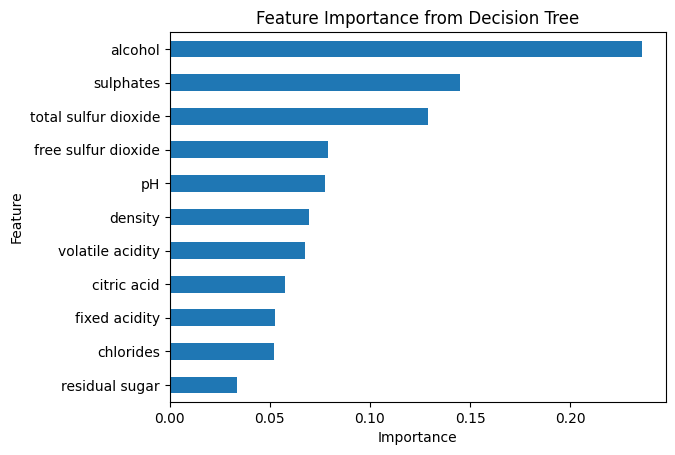

In [ ]:
import matplotlib.pyplot as plt

# Plotting feature importances
feature_importances_dt.sort_values(by="importance", ascending=True).plot(kind='barh', x='feature', y='importance', legend=False)
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
# Prediction function

def predict_wine(new_input):
    input_df = pd.DataFrame([new_input], columns=X.columns)
    input_scaled = scaler.transform(input_df)
    prediction = best_model.predict(input_scaled)

    return "GOOD" if prediction[0] == 1 else "BAD"



In [ ]:
sample1 = X.iloc[1].values

print("Sample 1 Prediction:", predict_wine(sample1))

Sample 1 Prediction: BAD


In [ ]:
Sample2 = X.iloc[2].values.copy()
Sample2[7] = 17.5

print("Sample 2 Prediction after alcohol :", predict_wine(Sample2))

Sample 2 Prediction after alcohol : BAD


In [ ]:
#sample1 prediction
good_sample = [
    6.5,   # fixed acidity
    0.30,  # volatile acidity (low)
    0.45,  # citric acid
    2.2,   # residual sugar
    0.05,  # chlorides
    15.0,  # free sulfur dioxide
    25.0,  # total sulfur dioxide
    0.9960,# density
    3.20,  # pH
    0.70,  # sulphates (good)
    12.5   # alcohol (HIGH = good)
]
#sample2 prediction
bad_sample = [
    7.8,   # fixed acidity
    0.80,  # volatile acidity (high = bad)
    0.10,  # citric acid
    2.0,   # residual sugar
    0.09,  # chlorides
    10.0,  # free sulfur dioxide
    35.0,  # total sulfur dioxide
    0.9980,# density
    3.40,  # pH
    0.45,  # sulphates (low)
    9.2    # alcohol (LOW = bad)
]

print("Sample1 Prediction:", predict_wine(bad_sample))
print("Sample2 Prediction:", predict_wine(good_sample))



Sample1 Prediction: BAD
Sample2 Prediction: GOOD
